In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (11, 7)


In [2]:
def boxplot(*args, **kwargs):
    labels = kwargs.pop('label', None)
    return sns.boxplot(*args, **kwargs)

In [123]:
financial_features =  ['salary', 'deferral_payments', 'total_payments', 
                       'loan_advances', 'bonus', 'restricted_stock_deferred', 
                       'deferred_income', 'total_stock_value', 'expenses', 
                       'exercised_stock_options', 'other', 'long_term_incentive', 
                       'restricted_stock', 'director_fees']

financial_features.remove('restricted_stock_deferred')
financial_features.remove('director_fees')
financial_features.remove('loan_advances')



email_features =  ['to_messages', 'email_address', 'from_poi_to_this_person', 
                   'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

label = 'poi'

feature_names = financial_features + email_features
feature_names.remove('email_address')

data = pd.read_csv('enron_employees.csv', na_values='NaN')
data = data[data.full_name != 'LAY KENNETH L']
data = data[data.full_name != 'FREVERT MARK A']

In [117]:
poi_count = len(data[data.poi == True])
non_poi_count = len(data[data.poi == False])

print("Number of POIs:\t\t%d" % poi_count)
print("Number of non-POIs:\t%d" % non_poi_count)
print("Total number:\t\t%d" % (poi_count + non_poi_count))
print("Majority class ratio:\t%f" % (float(non_poi_count) / (poi_count + non_poi_count)))


Number of POIs:		17
Number of non-POIs:	126
Total number:		143
Majority class ratio:	0.881119


In [5]:
def plot_data_presence_map(data):
    data_presence = np.logical_not(np.isnan(data.as_matrix(feature_names))).T.astype(float)
    poi_marker = data.poi.as_matrix().astype(float) + 1
    data_presence = data_presence * poi_marker
    
    plt.figure(figsize=(15, 4))
    g = plt.pcolormesh(data_presence, cmap='PuBu')
    plt.xlim(0, data_presence.shape[1])
    plt.ylim(0, data_presence.shape[0])
    plt.colorbar()

    g.axes.set_yticks(np.arange(len(feature_names)) + 0.5)
    g.axes.set_yticklabels(feature_names);

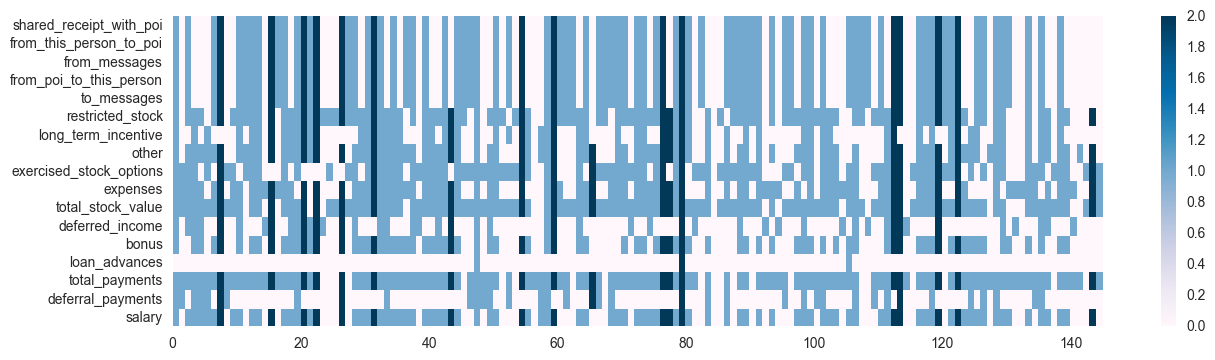

In [6]:
plot_data_presence_map(data)

In [7]:
data.describe()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
count,9.400000e+01,86.000000,3.800000e+01,1.240000e+02,1.010000e+02,8.100000e+01,1.090000e+02,86.000000,1.700000e+01,1.250000e+02,94.000000,3.000000e+00,86.000000,9.200000e+01,86.000000,16.000000,4.800000e+01,6.500000e+01,86.000000
mean,2.840875e+05,2073.860465,8.416025e+05,2.623421e+06,2.959559e+06,1.201773e+06,1.147424e+06,1176.465116,6.218928e+05,3.352073e+06,54192.010638,2.797500e+07,608.790698,4.652767e+05,41.232558,89822.875000,-5.810498e+05,7.464912e+05,64.895349
std,1.771311e+05,2582.700981,1.289323e+06,9.488106e+06,5.499450e+06,1.441679e+06,2.249770e+06,1178.317641,3.845528e+06,6.532883e+06,46108.377454,4.638256e+07,1841.033949,1.389719e+06,100.073111,41112.700735,9.420764e+05,8.629174e+05,86.979244
min,4.770000e+02,57.000000,-1.025000e+05,1.480000e+02,3.285000e+03,7.000000e+04,-2.604490e+06,2.000000,-1.787380e+06,-4.409300e+04,148.000000,4.000000e+05,12.000000,2.000000e+00,0.000000,3285.000000,-3.504386e+06,6.922300e+04,0.000000
25%,2.118020e+05,541.250000,7.964450e+04,3.863802e+05,5.067650e+05,4.250000e+05,2.520550e+05,249.750000,-3.298250e+05,4.941360e+05,22479.000000,1.200000e+06,22.750000,1.209000e+03,1.000000,83674.500000,-6.112092e+05,2.750000e+05,10.000000
50%,2.587410e+05,1211.000000,2.210635e+05,1.100246e+06,1.297049e+06,7.500000e+05,4.410960e+05,740.500000,-1.402640e+05,1.095040e+06,46547.500000,2.000000e+06,41.000000,5.198450e+04,8.000000,106164.500000,-1.519270e+05,4.221580e+05,35.000000
75%,3.086065e+05,2634.750000,8.672112e+05,2.084663e+06,2.542813e+06,1.200000e+06,9.850320e+05,1888.250000,-7.241900e+04,2.606763e+06,78408.500000,4.176250e+07,145.500000,3.575772e+05,24.750000,112815.000000,-3.792600e+04,8.318090e+05,72.250000
max,1.111258e+06,15149.000000,6.426990e+06,1.035598e+08,3.434838e+07,8.000000e+06,1.476169e+07,5521.000000,1.545629e+07,4.911008e+07,228763.000000,8.152500e+07,14368.000000,1.035973e+07,609.000000,137864.000000,-8.330000e+02,5.145434e+06,528.000000


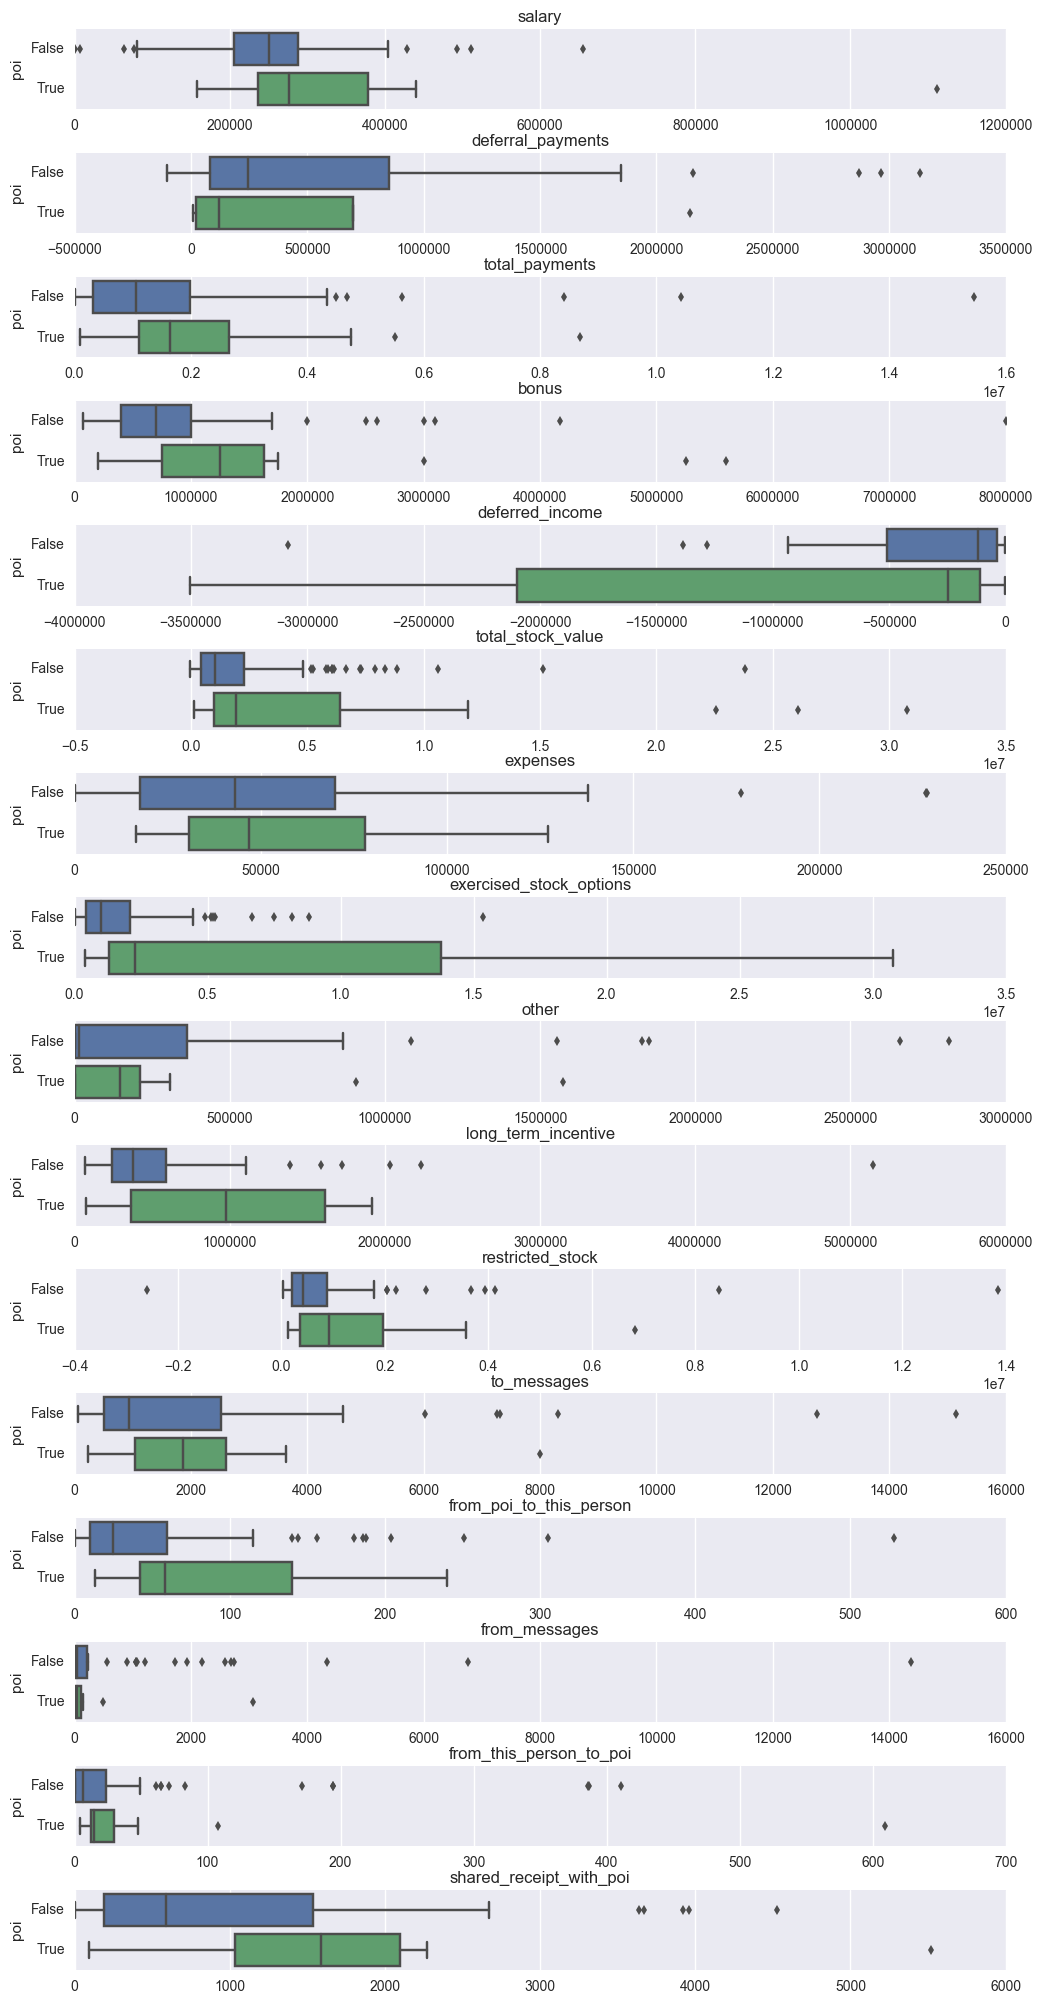

In [140]:
f, xarr = plt.subplots(len(feature_names), figsize=(10, 20))
f.tight_layout()
for i, feature in enumerate(feature_names):
    ax = xarr[i]
    sns.boxplot(data=data[[feature, label]], x=feature, y=label, ax=ax, orient='h')
    ax.set_xlabel("")
    ax.set_title(feature)



In [147]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.naive_bayes import GaussianNB

In [165]:
clf = GaussianNB()
pipe = Pipeline([('imputer', Imputer(strategy='median')), ('classifier', clf)])

In [176]:
names = ['exercised_stock_options', 'total_stock_value', 'deferred_income', 'bonus']
cv = LeaveOneOut()
scores = cross_val_score(pipe, data[names], data[label], cv=cv)
print("Avg score: ", scores.mean())
print("Scores spread: ", scores.std() * 2)

Avg score:  0.874125874126
Scores spread:  0.663414893742


In [136]:
from sklearn.feature_selection import SelectKBest, f_classif

In [158]:
fs = SelectKBest(k=7)
pipe = Pipeline([('imputer', Imputer(strategy='median')), ('classifier', fs)])
pipe.fit(data[feature_names], data[label])

Pipeline(steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('classifier', SelectKBest(k=7, score_func=<function f_classif at 0x117c16d90>))])

In [161]:
sorted(zip(feature_names, fs.scores_), key=lambda x: x[1], reverse=True)


[('exercised_stock_options', 20.258199314028058),
 ('total_stock_value', 17.200238397831821),
 ('deferred_income', 15.675465180983705),
 ('bonus', 9.7531413108282052),
 ('salary', 9.1671105923802152),
 ('shared_receipt_with_poi', 6.6468725485761837),
 ('long_term_incentive', 4.2600411269913332),
 ('from_poi_to_this_person', 4.1453934911676038),
 ('restricted_stock', 3.0166256813683181),
 ('from_this_person_to_poi', 2.4289337354376448),
 ('total_payments', 2.3642893033947181),
 ('expenses', 0.73984768231406273),
 ('to_messages', 0.54724510925170011),
 ('other', 0.25785782403528179),
 ('from_messages', 0.14925148097589136),
 ('deferral_payments', 0.081804914319568253)]

In [141]:
for feature in feature_names:
    print(data[['full_name', feature, 'poi']].sort_values(by=feature, ascending=False).head(3))

              full_name     salary    poi
122  SKILLING JEFFREY K  1111258.0   True
105    PICKERING MARK R   655037.0  False
138  WHALLEY LAWRENCE G   510364.0  False
           full_name  deferral_payments    poi
66  HORTON STANLEY C          3131860.0  False
68   HUMPHREY GENE E          2964506.0  False
0    ALLEN PHILLIP K          2869717.0  False
              full_name  total_payments    poi
11     BHATNAGAR SANJAY      15456290.0  False
78      LAVORATO JOHN J      10425757.0  False
122  SKILLING JEFFREY K       8682716.0   True
              full_name      bonus    poi
78      LAVORATO JOHN J  8000000.0  False
122  SKILLING JEFFREY K  5600000.0   True
7      BELDEN TIMOTHY N  5249999.0   True
              full_name  deferred_income    poi
15   BOWEN JR RAYMOND M           -833.0   True
49        GAHN ROBERT S          -1042.0  False
119          SHELBY REX          -4167.0   True
              full_name  total_stock_value    poi
65         HIRKO JOSEPH         30766064.0   T